# Regresión con variables categóricas

# 1. Introducción

En este análisis, exploramos cómo incluir variables categóricas en un modelo de regresión lineal. Además, validaremos los supuestos del modelo, estudiaremos la colinealidad y realizaremos predicciones.

# 2. Variables cuantitativas y cualitativas en regresión

En un análisis de regresión, las variables explicativas utilizadas suelen ser cuantitativas, lo que significa que se miden en una escala numérica bien definida. Por ejemplo:

* temperatura
* la distancia
* la presión
* el ingreso.

Sin embargo, en muchos casos también se requiere incluir variables cualitativas o categóricas como predictores. Estas variables no tienen una escala numérica natural, pero aun así pueden influir sobre la variable respuesta. Algunos ejemplos comunes son:

* sexo (masculino o femenino)
* estado laboral (empleado o desempleado)
* turno de trabajo (diurno, mixto o nocturno)
* operador que realiza un proceso

Para incorporar estas variables categóricas en un modelo de regresión, se recurre al uso de variables indicadoras (también llamadas variables ficticias o dummy variables)

# 3. Variables dummy

Estas variables permiten codificar los distintos niveles de una categoría como variables binarias (0 o 1), facilitando su inclusión en el modelo y permitiendo medir el efecto de cada categoría sobre la variable de interés

## 3.1 Ejemplo: Vida útil de una herramienta de corte

Ejemplo extraído del libro (Montgomery, Peck, and Vining 2006)

Un ingeniero mecánico desea estudiar cómo se relaciona la vida útil de un buril (una herramienta que corta con precisión materiales metálicos) con dos variables:

* la velocidad del torno, medida en revoluciones por minuto (rpm)
* el tipo de buril utilizado, que puede ser de tipo A o tipo B

El objetivo es construir un modelo de regresión lineal que permita predecir la vida útil del buril a partir de la velocidad del torno y del tipo de herramienta utilizada.

# 4. Lectura de los datos

In [15]:
library(ggplot2)
library(tidyverse)
library(GGally)
library(car) # para vif
library(broom)
library(dplyr)

In [16]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")
datos <- read.csv("TipoHerramienta.csv")
names(datos)

[1] "y"  "x1" "x2"

# 5. Scatter plot

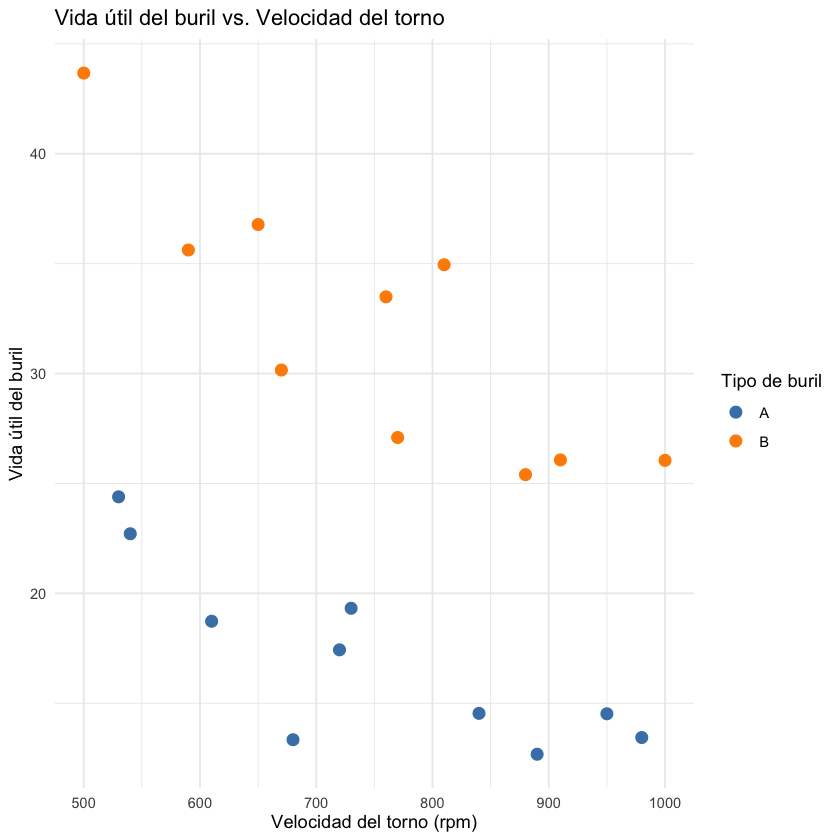

In [17]:
ggplot(datos, aes(x = x1, y = y, color = x2)) +
  geom_point(size = 3) +
  labs(
    title = "Vida útil del buril vs. Velocidad del torno",
    x = "Velocidad del torno (rpm)",
    y = "Vida útil del buril",
    color = "Tipo de buril"
  ) +
  theme_minimal() +
  scale_color_manual(values = c("A" = "steelblue", "B" = "darkorange"))

# 6. Codificación de las variables categóricas con variables dummy

Observemos que la velocidad es una variable cuantitativa (𝑋1), mientras que el tipo de buril es una variable cualitativa (𝑋2) con dos niveles. Para poder incluir esta variable categórica en el análisis de regresión, la codificaremos mediante la incorporación de una variable indicadora, también llamada dummy, que tomará los valores:

* 𝑋2
    * 0 si la observación procede de la herramienta tipo A
    * 1 si la observación procede de la herramienta tipo B

Observación: La elección de los valores 0 y 1 para codificar los niveles de la variable cualitativa es arbitraria, pero son los más usados

# 7. Modelo teórico propuesto

$$𝑌 = 𝛽_0 + 𝛽_1𝑋_1 +𝛽_2𝑋_2 + 𝜀 con 𝜀∼𝑁(0,𝜎^2)$$

* $X_2$ = 0

$$𝑌 = 𝛽_0 + 𝛽_1𝑋_1 + 𝜀$$

* $X_2$ = 1

$$𝑌 = (𝛽_0 + 𝛽_2) + 𝛽_1𝑋_1 + 𝜀$$

* Observación:
    * Ambos modelos tienen la misma pendiente $𝛽_1$, pero difieren en la ordenada al origen
    * Son rectas paralelas

# 8. Ajuste del Modelo de Regresión

In [18]:
modelo <- lm(y ~ x1 + x2, data = datos)
summary(modelo)


Call:
lm(formula = y ~ x1 + x2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5527 -1.7868 -0.0016  1.8395  4.9838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.98560    3.51038  10.536 7.16e-09 ***
x1          -0.02661    0.00452  -5.887 1.79e-05 ***
x2B         15.00425    1.35967  11.035 3.59e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.039 on 17 degrees of freedom
Multiple R-squared:  0.9003,	Adjusted R-squared:  0.8886 
F-statistic: 76.75 on 2 and 17 DF,  p-value: 3.086e-09


* Variables significativas, todos los p valores son muy chicos
* r^2 y r^2 ajust son muy buenos

# 9. Modelo Obtenido

In [19]:
beta0 <- modelo$coefficients[1]
beta1 <- modelo$coefficients[2]
beta2 <- modelo$coefficients[3]
beta0

(Intercept) 
    36.9856

In [20]:
beta1

x1 
-0.02660723

In [21]:
beta2

x2B 
15.00425

$$𝑌 = 36.986 − 0.0267𝑋_1 + 15.0047𝑋_2$$

# 10. Interpretación de los parámetros

* $𝛽_1$: indica el cambio en la duración promedio de las herramientas cuando aumento en 1 𝑟𝑝𝑚
 la velocidad.
* $𝛽_2$: indica el cambio en la duración promedio de las herramientas cuando cambio de la herramienta tipo 𝐴
 a la tipo 𝐵

# 11. Visualización del modelo ajustado por grupo

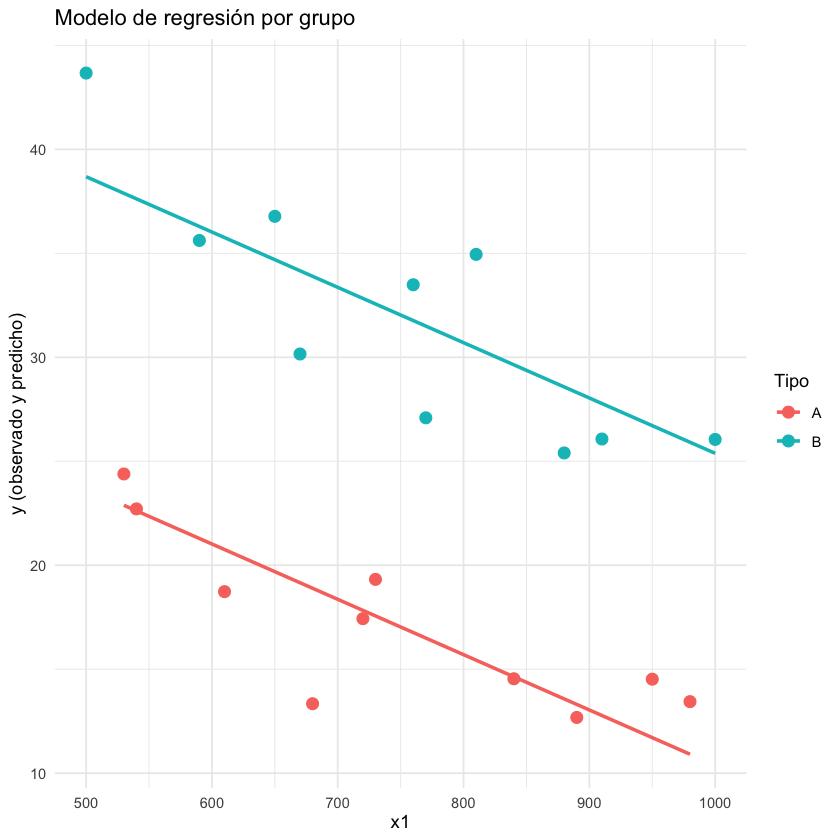

In [22]:
# Predicciones sobre el dataset original
datos_pred <- datos %>% mutate(pred = predict(modelo))

# Gráfico de puntos con regresión por grupo
ggplot(datos_pred, aes(x = x1, y = y, color = x2)) +
  geom_point(size = 3) +
  geom_line(aes(y = pred), linewidth = 1) +
  labs(
    title = "Modelo de regresión por grupo",
    x = "x1",
    y = "y (observado y predicho)",
    color = "Tipo"
  ) +
  theme_minimal()

## 11.1 ¿Qué muestra este gráfico?

* Los puntos representan los valores de la variable respuesta 𝑌
* Las líneas son las rectas de regresión ajustadas por grupo (tipo)
* Se puede ver cómo cambia la relación entre x1 y y según el tipo

* Aun no se codifico 0 y 1 en el dataframe, por eso aparece tipo A y tipo B

# 12. Verificación de supuestos

## 12.1 Plots de diagnósticos

### Residuos vs predichos

In [23]:
# Crear dataframe con residuos y valores ajustados
diagnostico <- augment(modelo)
diagnostico

y,x1,x2,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18.73,610,A,20.75519,-2.02519058,0.1415014,3.085016,2.841125e-02,-0.71910992
14.52,950,A,11.70873,2.81126779,0.1911200,3.034015,8.329508e-02,1.02839354
17.43,720,A,17.82840,-0.39839522,0.1016119,3.131273,7.209782e-04,-0.13828699
14.54,840,A,14.63553,-0.09552756,0.1191244,3.132932,5.054823e-05,-0.03348656
13.44,980,A,10.91052,2.52948471,0.2200420,3.050115,8.350345e-02,0.94231398
24.39,530,A,22.88377,1.50623098,0.2041216,3.104472,2.637885e-02,0.55547869
13.34,680,A,18.89268,-5.55268444,0.1099259,2.766026,1.543586e-01,-1.93637336
22.71,540,A,22.61770,0.09230328,0.1947463,3.132930,9.232410e-05,0.03384153
12.68,890,A,13.30517,-0.62516604,0.1452161,3.128471,2.802658e-03,-0.22246741


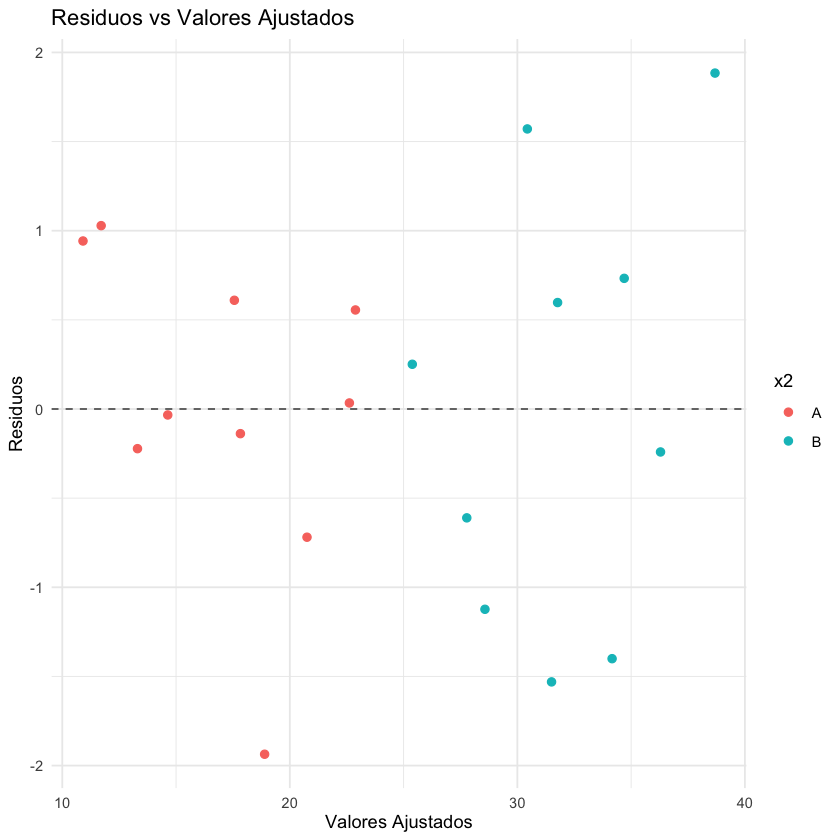

In [24]:
# Gráfico de residuos vs ajustados
ggplot(diagnostico, aes(.fitted, .std.resid,color=x2)) +
  geom_point(size = 2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray40") +
  labs(
    title = "Residuos vs Valores Ajustados",
    x = "Valores Ajustados",
    y = "Residuos"
  ) +
  theme_minimal()

* Los residuos de la herramienta tipo “B” muestran un poco más dispersión que los del tipo “A”. Puede haber un problema moderado de desigualdad de varianza
* Ninguno de los dos supera el umbral

### Normalidad de residuos

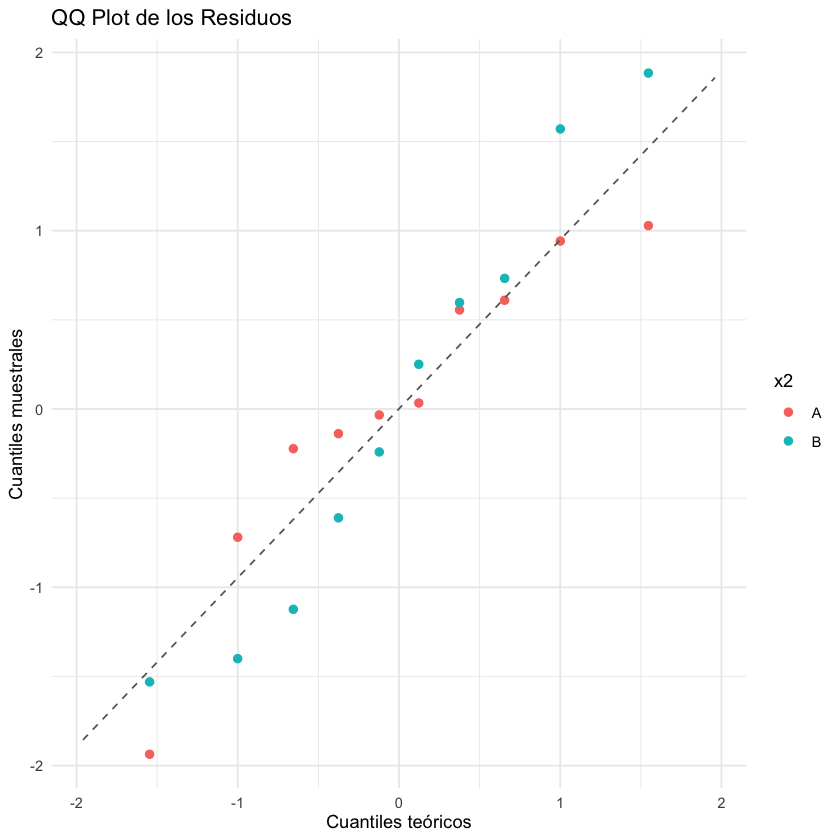

In [25]:
# Crear el QQ plot con ggplot2
ggplot(diagnostico, aes(sample = .std.resid, color=x2)) +
  stat_qq( size = 2) +
  stat_qq_line(color = "gray40", linetype = "dashed") +
  labs(
    title = "QQ Plot de los Residuos",
    x = "Cuantiles teóricos",
    y = "Cuantiles muestrales"
  ) +
  theme_minimal()


* Se observa que se cumple la hipótesis de normalidad de los residuos

# 13. Multicolinealidad

In [27]:
vif(modelo)

x1       x2 
1.000542 1.000542

* No hay multicolinealidad

# 14. Análisis de puntos influyentes

## 14.1 Laverage

In [31]:
n=dim(datos)[1]
p=3
hatvalues(modelo)[hatvalues(modelo)>2*p/n]

named numeric(0)

* No se observan puntos con alto leverage

## 14.2 Distancia de Cook

In [32]:
#distancias de cook
dcook <- cooks.distance(modelo)
p=3

#punto de corte
corte <- qf(0.5,p,n-p)
corte

[1] 0.8212088

In [33]:
dcook[dcook>corte]

named numeric(0)

* No se observa distancia de Cook

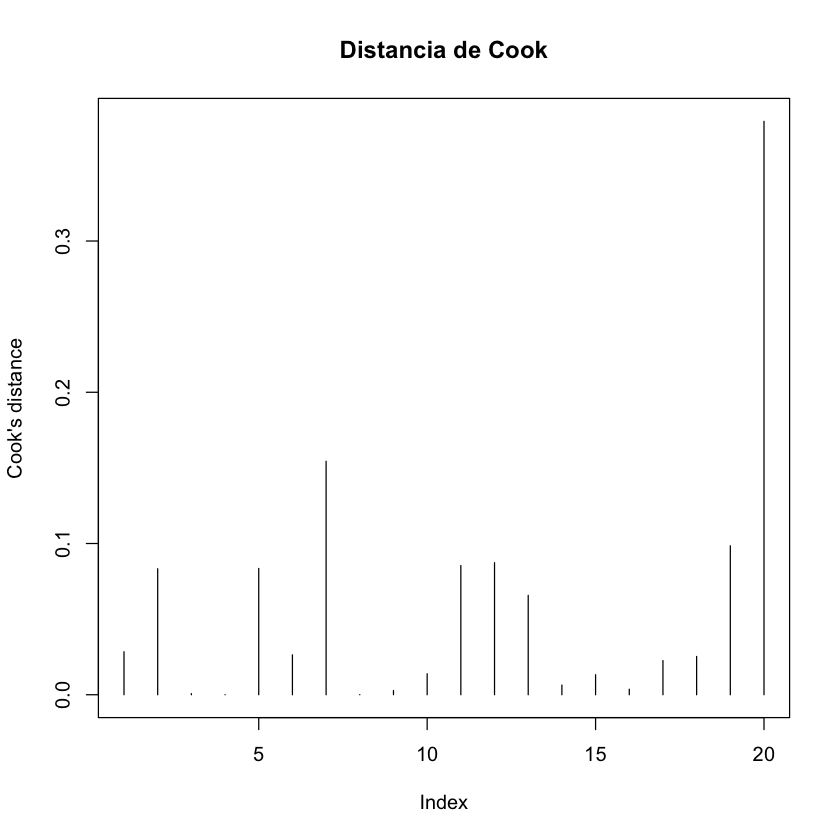

In [34]:
# Visualizar
plot(dcook, type = "h", main = "Distancia de Cook", ylab = "Cook's distance")
abline(h = corte, col = "red", lty = 2)

In [54]:
# Ver los índices de los puntos más influyentes
which(dcook >corte)

named integer(0)

* No se observan puntos con alta influencia

# 15. Salida del summary

## 15.1 $R^2$ y $R^2 ajustado$

In [35]:
# R^2
summary(modelo)$r.squared

[1] 0.9002884

In [36]:
# R^2 ajustado
summary(modelo)$adj.r.squared

[1] 0.8885576

* Ambos indican un buen ajuste 

## 15.2 Test F

In [40]:
resumen <- summary(modelo)
pf(resumen$fstatistic[1], 
   resumen$fstatistic[2], 
   resumen$fstatistic[3], 
   lower.tail = FALSE)

value 
3.085591e-09

* Es un pvalor muy chico, menor a 0.05
* Esto indica que se rechaza la hipótesis nula a nivel 0.05, es decir, el modelo de regresión es globalmente significativo
* Al menos una de las variables explicativas contribuye a explicar la variabilidad en la respuesta
* Test F habla de la significatividad del modelo global

## 15.3 Test t

* Los pvalores para testear si 𝛽0, 𝛽1 y 𝛽2 son significativos son todos chicos

In [41]:
resumen <- summary(modelo)

# Ver la tabla de coeficientes completa:
resumen$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),36.98560119,3.51038246,10.53606,7.163380e-09
x1,-0.02660723,0.00451972,-5.88692,1.793395e-05
x2B,15.00425061,1.35966970,11.03522,3.586837e-09


In [42]:
pvalores <- resumen$coefficients[, 4]
pvalores

(Intercept)           x1          x2B 
7.163380e-09 1.793395e-05 3.586837e-09

* Todos los parámetros son significativos
* Las dos variables regresoras contribuyen al modelo

# 16. Conclusiones del summary

* el pvalor asociado a la prueba F es muy chico (3.086e-09), mucho menor que el nivel de significación usual (0.05). Por lo tanto se rechaza la hipótesis nula de que todos los coeficientes son cero
* esto indica que el modelo de regresión es globalmente significativo, es decir, al menos una de las variables predictoras contribuye de manera significativa a explicar la vida útil del buril
* los p valores para las hipótesis correspondientes para 𝛽1 y 𝛽2 también son chicos. Por lo tanto, las dos variables regresoras contribuyen al modelo

# 17. Adecuación del modelo

De acuerdo al análisis previamente realizado, no se observan indicios de que el modelo no sea adecuado

# 18. Intervalos de confianza para los parámetros

In [43]:
confint(modelo)

,2.5 %,97.5 %
(Intercept),29.57934160,44.39186079
x1,-0.03614301,-0.01707145
x2B,12.13559830,17.87290293


* Recordemos que el parámetro 𝛽2 representa el cambio promedio de la herramienta, debido a un cambio del tipo A al tipo B de herramienta
* El intervalo de confianza del 95% para el efecto del cambio de buril de tipo 𝐴 a tipo 𝐵 indica un aumento en la duración de la herramienta comprendido entre 12.135 y 17.873 horas

# 19. Predicciones

In [44]:
nuevos <- data.frame(
  x1 = c(700, 800),
  x2 = c("A", "B")
)

predict(modelo, nuevos, interval = "prediction") 

,fit,lwr,upr
1,18.36054,11.61986,25.10122
2,30.70407,23.96401,37.44412


# 20. Conclusiones

* El modelo permite evaluar diferencias entre los grupos A y B.
* Se verifica que el tipo de herramienta tiene un efecto significativo sobre 𝑌
* Se validaron los supuestos y se exploró la colinealidad y existencia de puntos influyentes, dando un modelo que resulta adecuado

# 21. Justificación del uso de un modelo único con variable indicadora

Aunque es posible ajustar dos modelos de regresión separados —uno para cada tipo de buril—, se opta por utilizar un único modelo que incorpora una variable indicadora. Esta elección presenta varias ventajas:

* Simplificación del modelo: se obtiene una única ecuación para describir la relación entre la vida útil del buril y la velocidad del torno, considerando dos tipos de herramientas, lo cual facilita su interpretación y aplicación práctica.

* Eficiencia en la estimación: dado que se asume una pendiente común para ambos tipos de buril, combinar los datos permite una estimación más precisa de ese parámetro.

* Mayor uso de la información disponible: al no dividir la muestra, se preservan más grados de libertad para estimar la varianza del error, lo cual mejora la robustez de las inferencias estadísticas.

* Estimación común de la varianza del error: el modelo único permite calcular una sola estimación de la varianza, que se basa en un conjunto más amplio de datos y ofrece mayor precisión para construir intervalos de confianza y realizar contrastes.

# 22. Interacciones

En regresión, una interacción ocurre cuando el efecto de una variable independiente (por ejemplo 𝑋1
) sobre la variable dependiente (𝑌
) cambia según el valor de otra variable independiente (por ejemplo 𝑋2
).

Por ejemplo: Queremos estudiar el efecto del ejercicio físico (𝑋1
) sobre el nivel de colesterol en sangre (𝑌
). Este nivel podría depender de una dieta (𝑋2
). Entonces, el efecto del ejercicio cambia si la persona tiene una dieta saludable o no.

Esto quiere decir, que la pendiente cambia según si la persona sigue una dieta o no.

## 22.1 Interpretación de los parámetros

* 𝛽2 : representa el cambio en la ordenada al origen cuando cambio de tipo de buril (de 𝐴 a 𝐵)
* 𝛽3 : indica el cambio en la pendiente cuando cambio el tipo de buril

## 22.2 Ajustar el modelo con interacción

* Modelo con interacción es con * (todas las combinaciones)

In [49]:
modelo_con_interaccion <- lm(y ~ x1 * x2, data = datos)
summary(modelo_con_interaccion)


Call:
lm(formula = y ~ x1 * x2, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1750 -1.4999  0.4849  1.7830  4.8652 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.774760   4.633472   7.073 2.63e-06 ***
x1          -0.020970   0.006074  -3.452  0.00328 ** 
x2B         23.970593   6.768973   3.541  0.00272 ** 
x1:x2B      -0.011944   0.008842  -1.351  0.19553    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.968 on 16 degrees of freedom
Multiple R-squared:  0.9105,	Adjusted R-squared:  0.8937 
F-statistic: 54.25 on 3 and 16 DF,  p-value: 1.319e-08


## 22.3 Visualización de la interacción

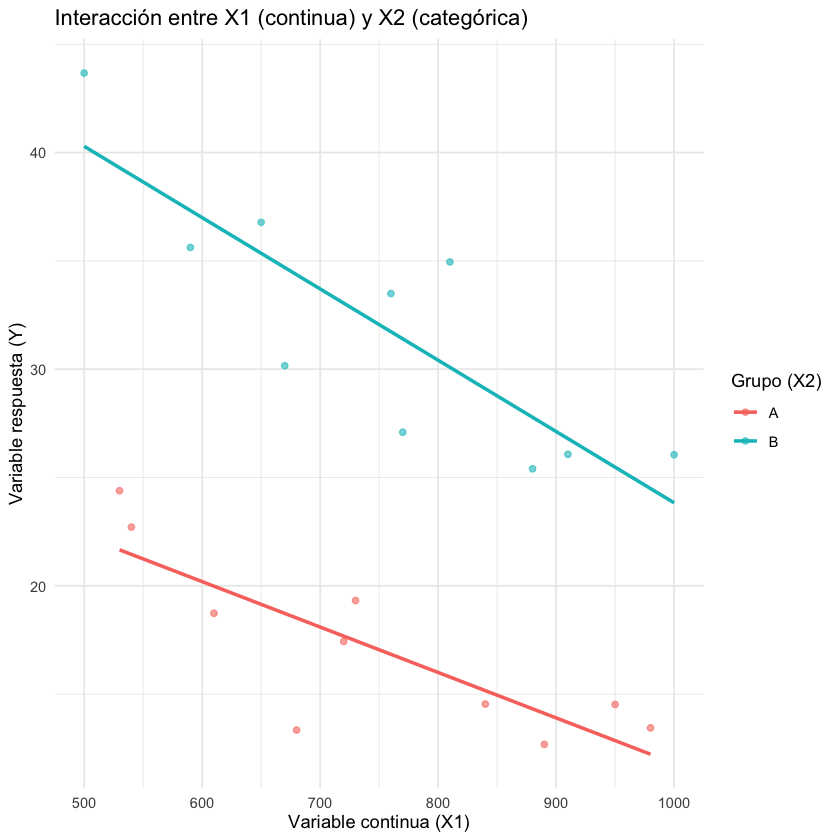

In [47]:
ggplot(datos, aes(x = x1, y = y, color = x2)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", formula = 'y ~ x', se = FALSE) +
  labs(title = "Interacción entre X1 (continua) y X2 (categórica)",
       x = "Variable continua (X1)",
       y = "Variable respuesta (Y)",
       color = "Grupo (X2)") +
  theme_minimal()